### Integrantes: Nicolás Galíndez, Nicolás Palazón y Patricio Jaime Peralta Ramos Guerrero

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset
from utils import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [164]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parte 1

In [165]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_04087', 'pixel_04088', 'pixel_04089', 'pixel_04090',
       'pixel_04091', 'pixel_04092', 'pixel_04093', 'pixel_04094',
       'pixel_04095', 'label'],
      dtype='object', length=4097)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

## Ejercicio 2

In [166]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20)

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values
y = df['label'].values

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


## Ejercicio 3

Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2493, Acc=0.5123 | Test MSE=0.2507, Acc=0.4509
Iteración 200: Train MSE=0.2486, Acc=0.5123 | Test MSE=0.2502, Acc=0.4509
Iteración 300: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 400: Train MSE=0.2474, Acc=0.5237 | Test MSE=0.2491, Acc=0.4571
Iteración 500: Train MSE=0.2468, Acc=0.5406 | Test MSE=0.2486, Acc=0.4693
Iteración 600: Train MSE=0.2462, Acc=0.5666 | Test MSE=0.2481, Acc=0.4785
Iteración 700: Train MSE=0.2456, Acc=0.5965 | Test MSE=0.2476, Acc=0.5123
Iteración 800: Train MSE=0.2450, Acc=0.6133 | Test MSE=0.2472, Acc=0.5307
Iteración 900: Train MSE=0.2444, Acc=0.6233 | Test MSE=0.2467, Acc=0.5644
Iteración 1000: Train MSE=0.2438, Acc=0.6325 | Test MSE=0.2462, Acc=0.5736
Iteración 1100: Train MSE=0.2432, Acc=0.6378 | Test MSE=0.2457, Acc=0.6012
Iteración 1200: Train MSE=0.2426, Acc=0.6531 | Test MSE=0.2452, Acc=0.6166
Iteración 1300: Train MSE=0.2420, Acc

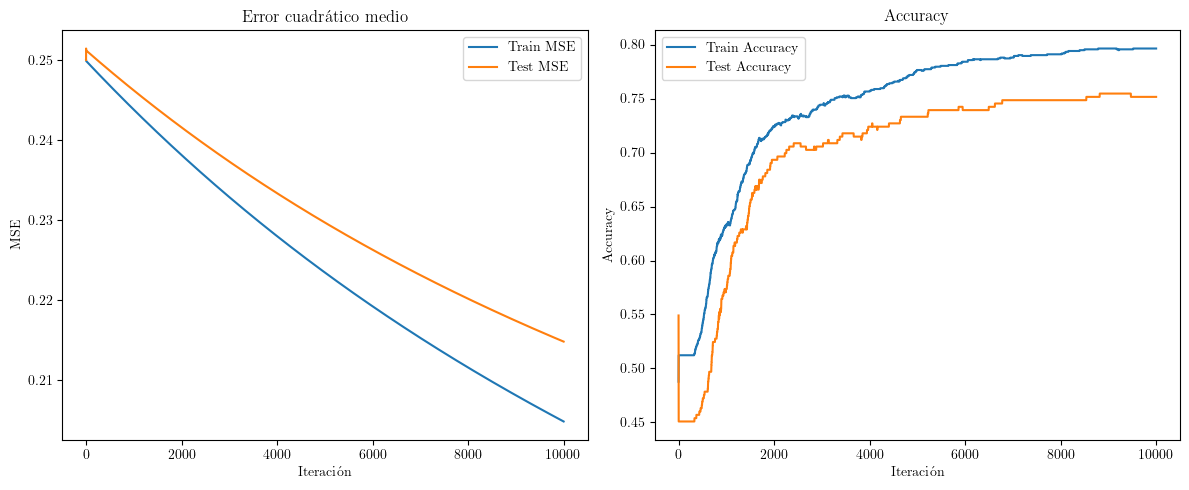

In [117]:
w_final, b_final, metrics = gradient_descent(X_train, y_train, X_test, y_test, alpha=1e-11, num_it=10000)
plot_metrics(metrics, save_path='graficos/1.png')

## Ejercicio 4


Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2451, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6256 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6196
Iteración 900: Train MSE=0.2415, Acc=0.6799 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6975 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7113 | Test MSE=0.2429, Acc=0.6748
Iteración 1200: Train MSE=0.2390, Acc=0.7152 | Test MSE=0.2423, Acc=0.6810
Iteración 1300: Train MSE=0.2381, Acc

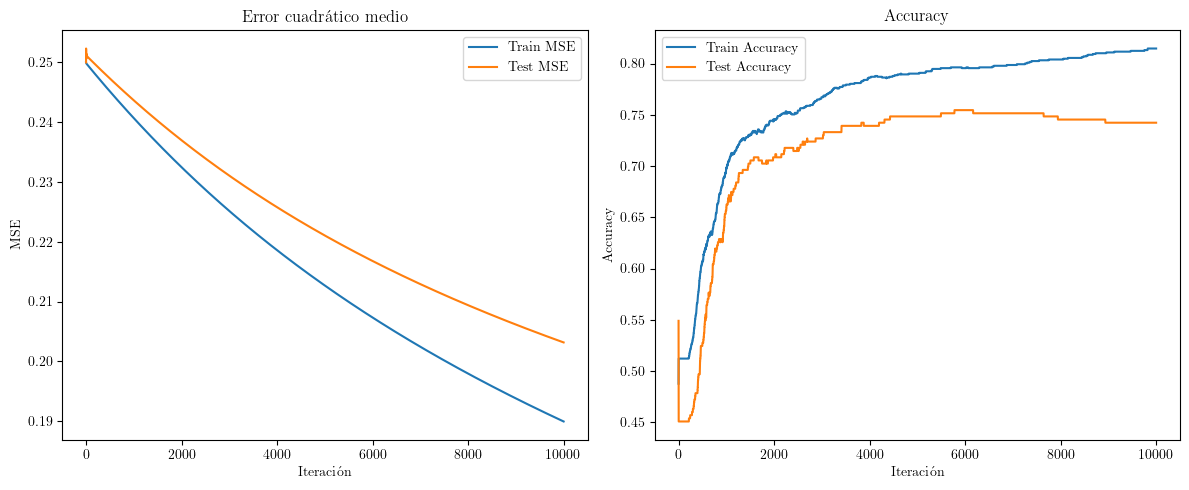

MSE final en Train: 0.1899
Accuracy final en Train: 0.8147
MSE final en Test: 0.2032
Accuracy final en Test: 0.7423


In [147]:
# Normalizamos los valores
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)

plot_metrics(metrics, save_path='graficos/2.png')

print(f"MSE final en Train: {metrics['train_mse_list'][-1]:.4f}")
print(f"Accuracy final en Train: {metrics['train_acc_list'][-1]:.4f}")
print(f"MSE final en Test: {metrics['test_mse_list'][-1]:.4f}")
print(f"Accuracy final en Test: {metrics['test_acc_list'][-1]:.4f}")

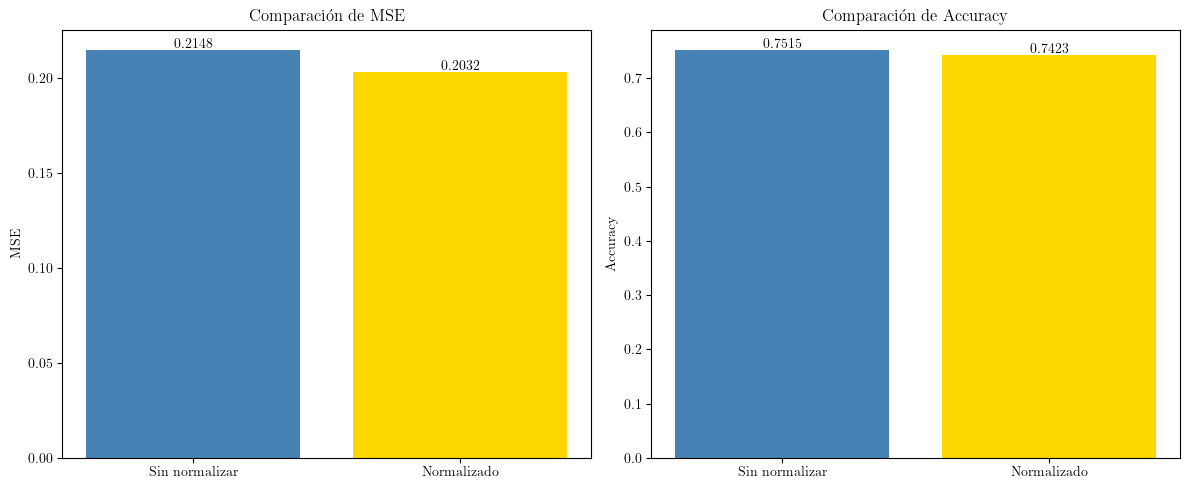

Mejora en MSE: 5.40%
Mejora en Accuracy: -1.22%


In [148]:
# Comparación de resultados con y sin normalización
non_norm_mse = 0.2148
non_norm_acc = 0.7515
norm_mse = 0.2032
norm_acc = 0.7423

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficamos la comparación de MSE
categories = ['Sin normalizar', 'Normalizado']
mse_values = [non_norm_mse, norm_mse]
colors = ['steelblue', 'gold']

ax1.bar(categories, mse_values, color=colors)
ax1.set_ylabel('MSE')
ax1.set_title('Comparación de MSE')
for i, v in enumerate(mse_values):
    ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Graficamos la comparación de accuracy
acc_values = [non_norm_acc, norm_acc]

ax2.bar(categories, acc_values, color=colors)
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparación de Accuracy')
for i, v in enumerate(acc_values):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.savefig('graficos/3.png', dpi=300)
plt.tight_layout()
plt.show()

# Imprimir mejoras
mse_improvement = ((non_norm_mse - norm_mse) / non_norm_mse) * 100
acc_improvement = ((norm_acc - non_norm_acc) / non_norm_acc) * 100

print(f"Mejora en MSE: {mse_improvement:.2f}%")
print(f"Mejora en Accuracy: {acc_improvement:.2f}%")


Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 200: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 300: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 400: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 500: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 600: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 700: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 800: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 900: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 1000: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 1100: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 1200: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2500, Acc=0.4509
Iteración 1300: Train MSE=0.2500, Acc

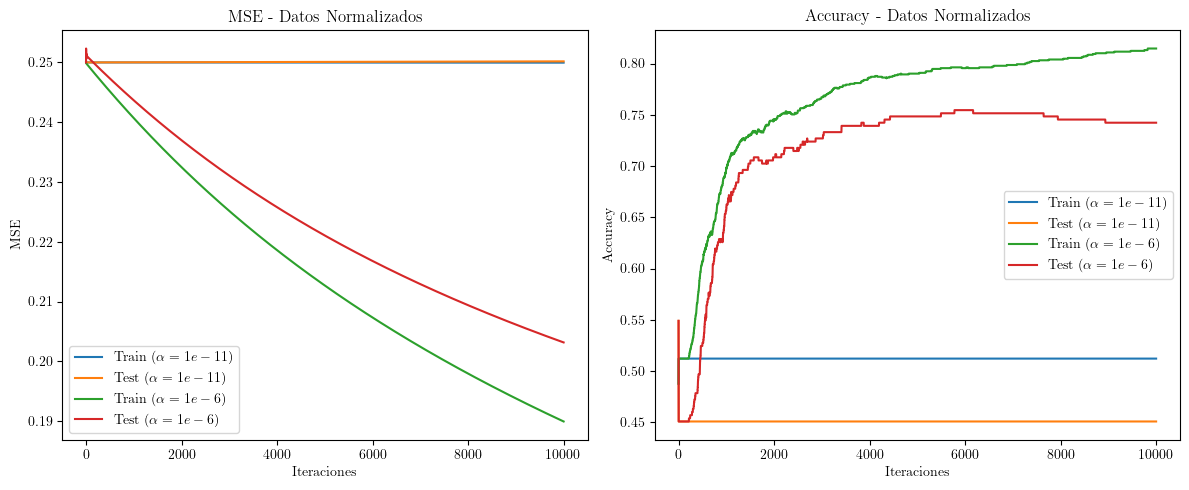

In [149]:
# Normalización
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Entrenamiento con datos normalizados para alpha = 1e-11 y 1e-6
w1, b1, metrics1 = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-11, num_it=10000)
w2, b2, metrics2 = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)

# Gráfico de convergencia para datos normalizados
plt.figure(figsize=(12, 5))

# Subplot para MSE
plt.subplot(1, 2, 1)
plt.plot(metrics1['train_mse_list'], label=f'Train ($\\alpha = 1e-11$)')
plt.plot(metrics1['test_mse_list'], label=f'Test ($\\alpha = 1e-11$)')
plt.plot(metrics2['train_mse_list'], label=f'Train ($\\alpha = 1e-6$)')
plt.plot(metrics2['test_mse_list'], label=f'Test ($\\alpha = 1e-6$)')
plt.title('MSE - Datos Normalizados')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()

# Subplot para Accuracy
plt.subplot(1, 2, 2)
plt.plot(metrics1['train_acc_list'], label=f'Train ($\\alpha = 1e-11$)')
plt.plot(metrics1['test_acc_list'], label=f'Test ($\\alpha = 1e-11$)')
plt.plot(metrics2['train_acc_list'], label=f'Train ($\\alpha = 1e-6$)')
plt.plot(metrics2['test_acc_list'], label=f'Test ($\\alpha = 1e-6$)')
plt.title('Accuracy - Datos Normalizados')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('graficos/4.png', dpi=300)
plt.show()

## Ejercicio 5


Descenso de gradiente para alpha = 1e-06
Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2451, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6256 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6196
Iteración 900: Train MSE=0.2415, Acc=0.6799 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6975 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7113 | Test MSE=0.2429, Acc=0.6748
Iteración 1200: Train MSE=0.2390, Acc=0.7152 | Test MSE=0.2423, Acc=0.

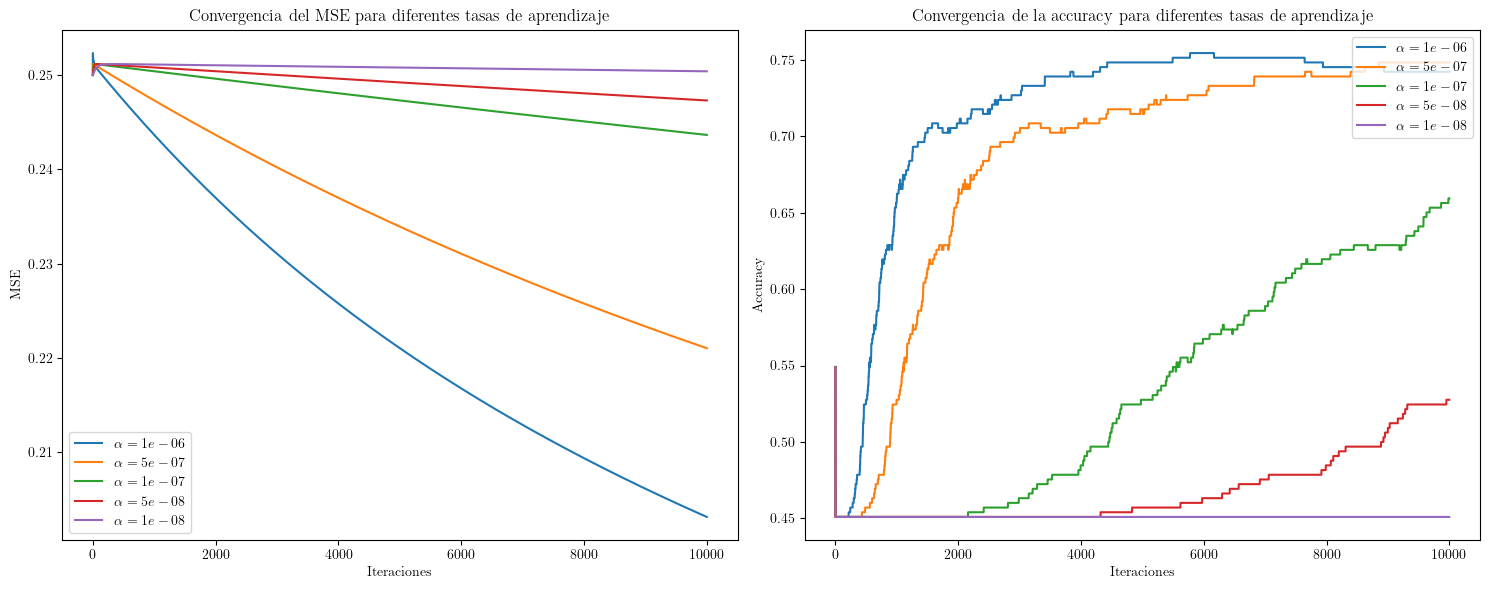

In [150]:
valores_alpha = [1e-6, 5*1e-7, 1e-7, 5*1e-8, 1e-8]
alpha_mse_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nDescenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=10000)
    alpha_mse_lists.append(metrics['test_mse_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])
    

plt.figure(figsize=(15, 6))

# Graficamos convergencia del MSE
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_mse_lists[i], label=f'$\\alpha = {alpha}$')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Convergencia del MSE para diferentes tasas de aprendizaje')
plt.legend()

# Graficamos convergencia de accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'$\\alpha = {alpha}$')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Convergencia de la accuracy para diferentes tasas de aprendizaje')
plt.legend(loc='upper right')

plt.savefig('graficos/5.png')
plt.tight_layout()
plt.show()


Descenso de gradiente para alpha = 1e-06
Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2451, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6256 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6196
Iteración 900: Train MSE=0.2415, Acc=0.6799 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6975 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7113 | Test MSE=0.2429, Acc=0.6748
Iteración 1200: Train MSE=0.2390, Acc=0.7152 | Test MSE=0.2423, Acc=0.

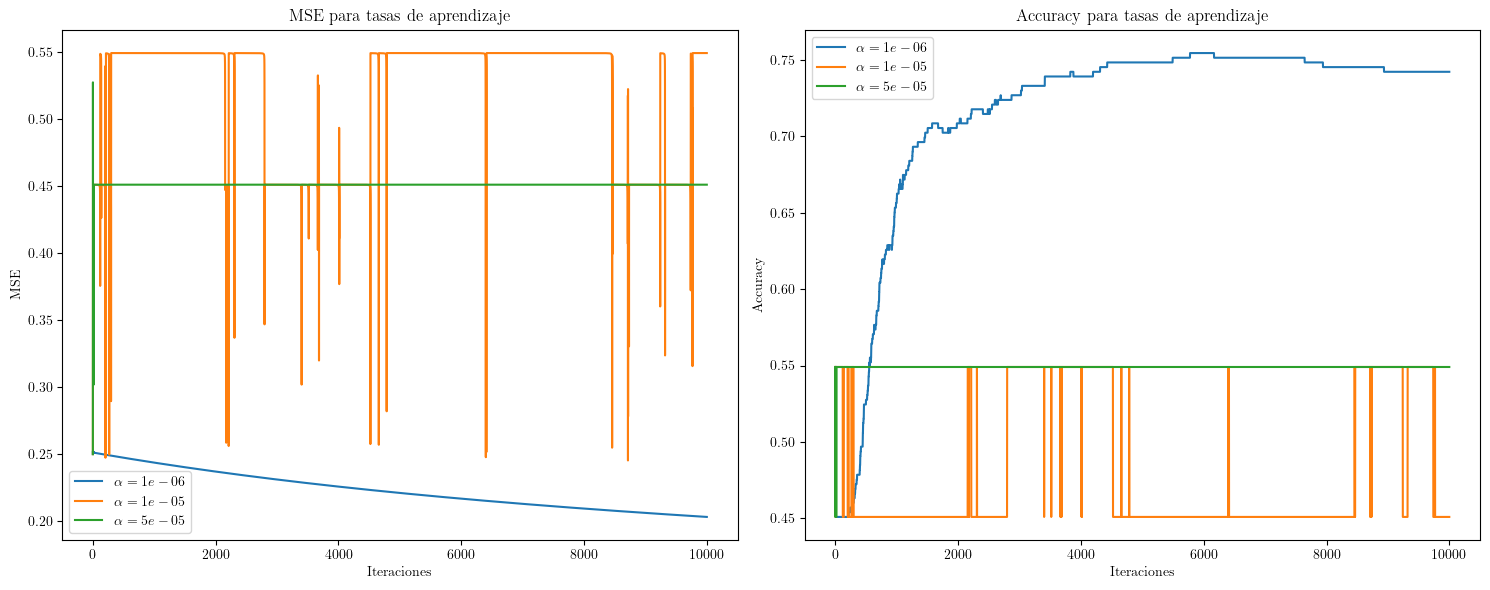

In [151]:
# Valores de alpha a comparar
valores_alpha = [1e-6, 1e-5, 5e-5]
alpha_mse_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nDescenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=num_it)
    alpha_mse_lists.append(metrics['test_mse_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])

# Graficar resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# MSE
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_mse_lists[i], label=f'$\\alpha = {alpha}$')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('MSE para tasas de aprendizaje')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'$\\alpha = {alpha}$')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Accuracy para tasas de aprendizaje')
plt.legend()

plt.tight_layout()
plt.savefig('graficos/6.png', dpi=300)
plt.show()

## Ejercicio 6


Tamaño: (32, 32)
Dataset guardado en processed_dataset_32.npz

--> Alpha: 4e-06
Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2493, Acc=0.5123 | Test MSE=0.2506, Acc=0.4509
Iteración 200: Train MSE=0.2486, Acc=0.5123 | Test MSE=0.2501, Acc=0.4509
Iteración 300: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2495, Acc=0.4509
Iteración 400: Train MSE=0.2474, Acc=0.5237 | Test MSE=0.2490, Acc=0.4571
Iteración 500: Train MSE=0.2468, Acc=0.5368 | Test MSE=0.2484, Acc=0.4785
Iteración 600: Train MSE=0.2462, Acc=0.5574 | Test MSE=0.2479, Acc=0.5031
Iteración 700: Train MSE=0.2456, Acc=0.5781 | Test MSE=0.2474, Acc=0.5276
Iteración 800: Train MSE=0.2450, Acc=0.5942 | Test MSE=0.2469, Acc=0.5521
Iteración 900: Train MSE=0.2444, Acc=0.6149 | Test MSE=0.2463, Acc=0.5521
Iteración 1000: Train MSE=0.2439, Acc=0.6194 | Test MSE=0.2458, Acc=0.5736
Iteración 1100: Train MSE=0.2433, Acc=0.6271 | Test MSE=0.2453, Acc=0.5982
Iteración 1200: Train MSE=0.242

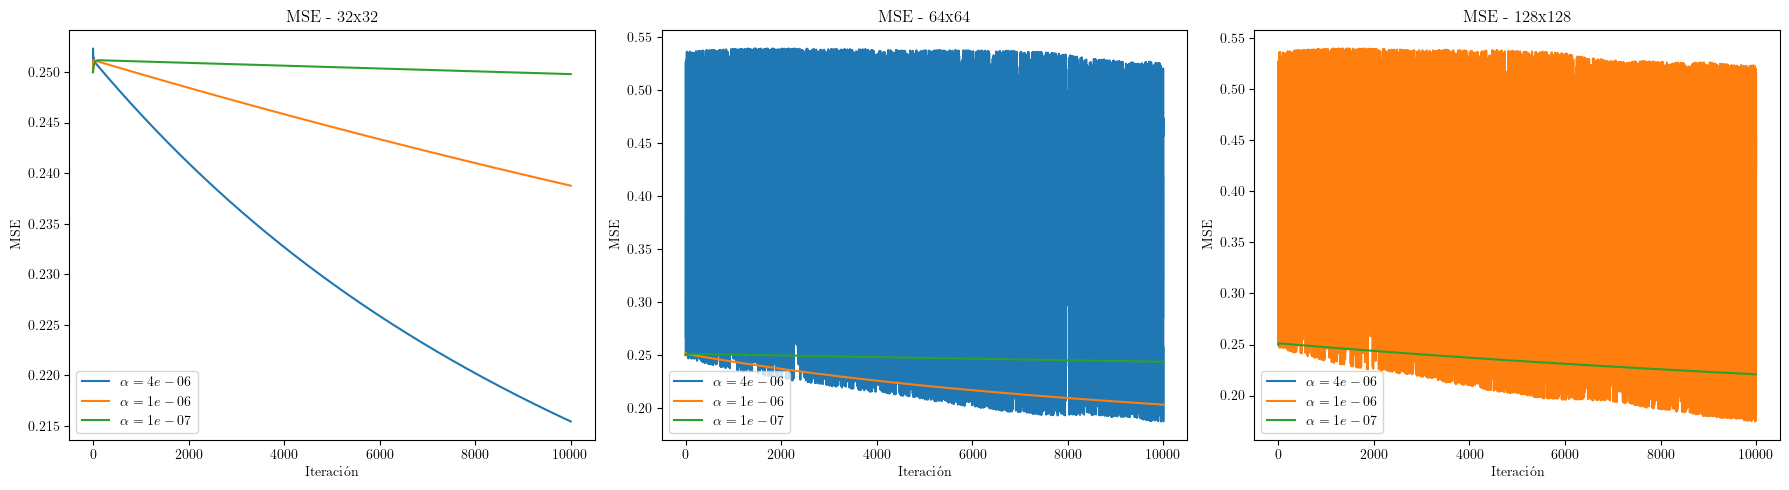

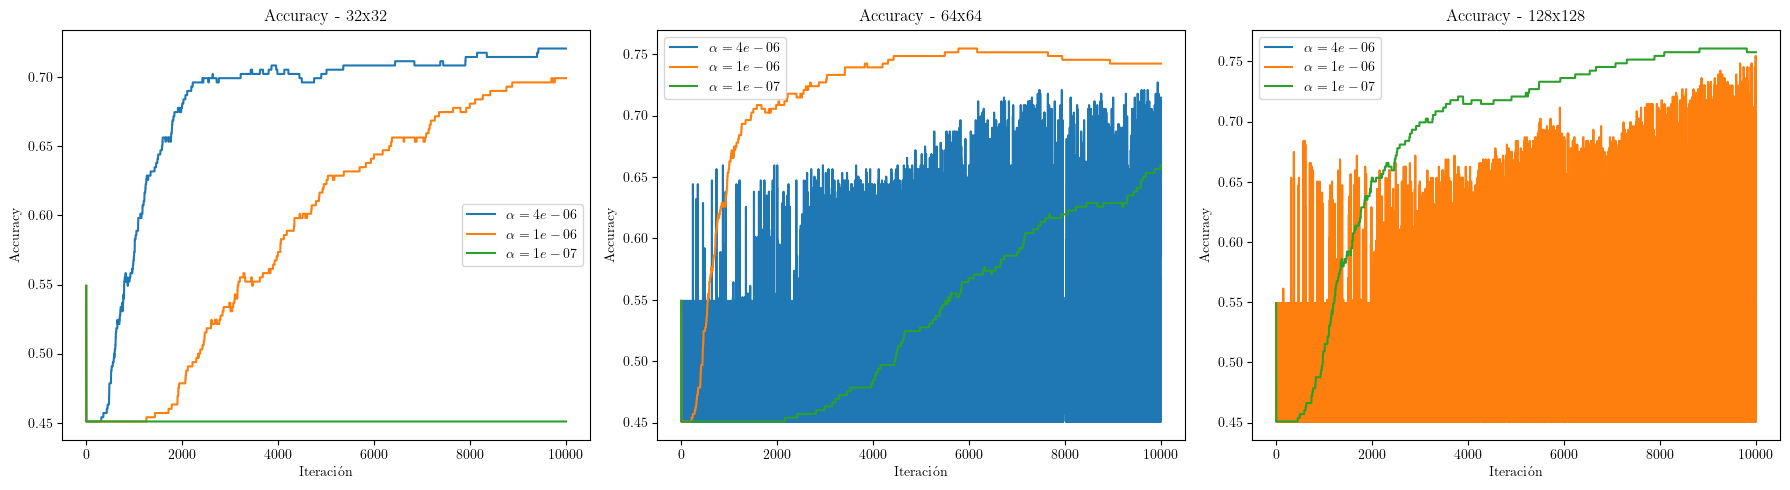

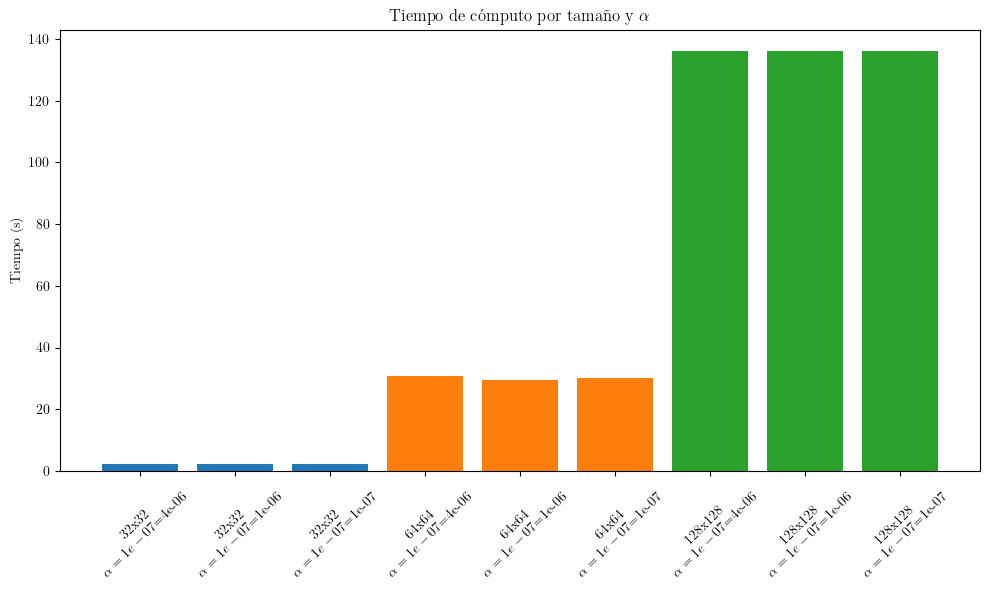

In [ ]:
import time
from pathlib import Path

# Resoluciones y alphas a probar
resolutions = [(32, 32), (64, 64), (128, 128)]
alphas_to_test = [4e-6, 1e-6, 1e-7]

# Para guardar resultados
results = []

for res in resolutions:
    print(f"\n=============================")
    print(f"Tamaño: {res}")
    print(f"=============================")

    healthy_dir = Path("DatasetTP/Healthy")
    parkinson_dir = Path("DatasetTP/Parkinson")

    processed_images = []
    labels = []

    for img_path in healthy_dir.glob("*.png"):
        img = process_image(img_path, target_size=res)
        if img is not None:
            processed_images.append(img)
            labels.append(0)

    for img_path in parkinson_dir.glob("*.png"):
        img = process_image(img_path, target_size=res)
        if img is not None:
            processed_images.append(img)
            labels.append(1)

    processed_images = np.array(processed_images)
    labels = np.array(labels)

    output_file = f"processed_dataset_{res[0]}.npz"
    save_processed_dataset(processed_images, labels, output_path=output_file)

    df = numpy_to_pandas_dataset(output_file)

    X = df.drop('label', axis=1).values
    y = df['label'].values

    # Split
    test_size = 0.2
    random_state = 42
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Normalizar
    X_train_norm = X_train / 255.0
    X_test_norm = X_test / 255.0

    for alpha in alphas_to_test:
        print(f"\n--> Alpha: {alpha}")

        start_time = time.time()
        w_final, b_final, metrics = gradient_descent(
            X_train_norm, y_train, X_test_norm, y_test,
            alpha=alpha, num_it=10000
        )
        end_time = time.time()
        elapsed_time = end_time - start_time

        final_acc = metrics['test_acc_list'][-1]
        final_mse = metrics['test_mse_list'][-1]

        # Guardar resultados
        results.append({
            'size': f"{res[0]}x{res[1]}",
            'alpha': alpha,
            'metrics': metrics,
            'time': elapsed_time,
            'final_acc': final_acc,
            'final_mse': final_mse
        })

        print(f"Accuracy final: {final_acc:.4f}")
        print(f"MSE final: {final_mse:.4f}")
        print(f"Tiempo: {elapsed_time:.2f}s")

# ================================
# Gráficos de MSE (3 subplots)
# ================================

plt.figure(figsize=(18, 5))
for i, res in enumerate(resolutions):
    plt.subplot(1, 3, i + 1)
    for alpha in alphas_to_test:
        # Filtrar resultados correspondientes
        m = next(item for item in results if item['size'] == f"{res[0]}x{res[1]}" and item['alpha'] == alpha)
        plt.plot(m['metrics']['test_mse_list'], label=f'$\\alpha = {alpha}$')
    plt.xlabel('Iteración')
    plt.ylabel('MSE')
    plt.title(f"MSE - {res[0]}x{res[1]}")
    plt.legend()

plt.tight_layout()
plt.savefig('graficos/7.png', dpi=300)
plt.show()

# ================================
# Gráficos de Accuracy (3 subplots)
# ================================

plt.figure(figsize=(18, 5))
for i, res in enumerate(resolutions):
    plt.subplot(1, 3, i + 1)
    for alpha in alphas_to_test:
        m = next(item for item in results if item['size'] == f"{res[0]}x{res[1]}" and item['alpha'] == alpha)
        plt.plot(m['metrics']['test_acc_list'], label=f'$\\alpha = {alpha}$')
    plt.xlabel('Iteración')
    plt.ylabel('Accuracy')
    plt.title(f"Accuracy - {res[0]}x{res[1]}")
    plt.legend()

plt.tight_layout()
plt.savefig('graficos/8.png', dpi=300)
plt.show()


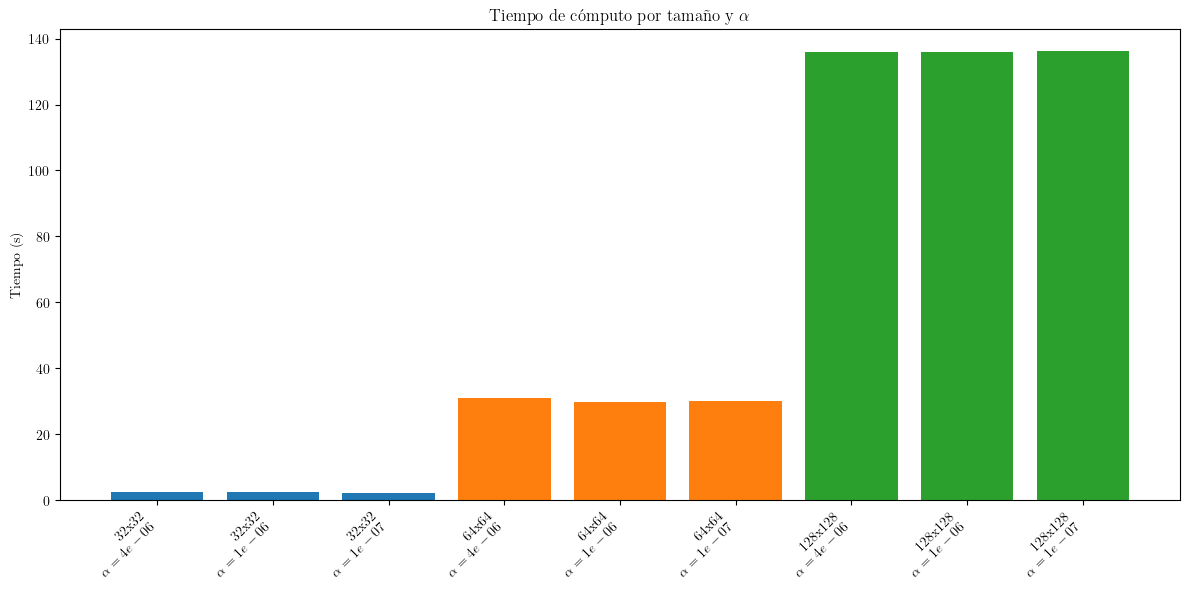

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponemos que ya tienes tu dataframe
df_summary = pd.DataFrame(results)

# Definir colores por tamaño (puedes personalizarlos)
color_map = {
    '32x32': 'tab:blue',
    '64x64': 'tab:orange',
    '128x128': 'tab:green'
}

# Crear etiquetas bonitas con salto de línea y LaTeX
df_summary['label'] = df_summary.apply(
    lambda row: f"{row['size']}\n$\\alpha = {row['alpha']}$", axis=1
)

# Obtener colores según tamaño
df_summary['color'] = df_summary['size'].map(color_map)

# Hacer el gráfico
plt.figure(figsize=(12, 6))
plt.bar(
    df_summary['label'],
    df_summary['time'],
    color=df_summary['color']
)

plt.ylabel('Tiempo (s)')
plt.title('Tiempo de cómputo por tamaño y $\\alpha$')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('graficos/9.png', dpi=300)
plt.show()

## Ejercicio 7

In [161]:
def confusion_matrix(y_true, y_pred):
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    return np.array([[TN, FP],
                     [FN, TP]])

In [168]:
alpha = 1e-6
w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha, 10000)

Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2451, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6256 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6196
Iteración 900: Train MSE=0.2415, Acc=0.6799 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6975 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7113 | Test MSE=0.2429, Acc=0.6748
Iteración 1200: Train MSE=0.2390, Acc=0.7152 | Test MSE=0.2423, Acc=0.6810
Iteración 1300: Train MSE=0.2381, Acc

In [169]:
y_pred_probs = predict(X_test_norm, w_final, b_final)

# Usamos un umbral para convertir los labels de y_pred a 0 y 1
y_pred = (y_pred_probs >= 0.5).astype(int)

cm = confusion_matrix(y_pred, y_test)
cm

array([[122,  27],
       [ 57, 120]])

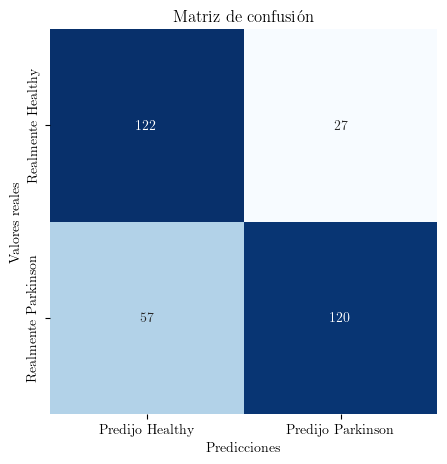

In [170]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predijo Healthy', 'Predijo Parkinson'],
            yticklabels=['Realmente Healthy', 'Realmente Parkinson'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.savefig('graficos/10.png', dpi=300)
plt.show()

# Parte 2

## Ejercicio 2

In [171]:
w_final, b_final, metrics = gradient_ascent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)

Iteración 0: Train LogLoss=0.6931 , Acc=0.4877| Test LogLoss=0.6931, Acc=0.5491
Iteración 100: Train LogLoss=0.6919 , Acc=0.5123| Test LogLoss=0.6947, Acc=0.4509
Iteración 200: Train LogLoss=0.6910 , Acc=0.5123| Test LogLoss=0.6939, Acc=0.4509
Iteración 300: Train LogLoss=0.6900 , Acc=0.5123| Test LogLoss=0.6932, Acc=0.4509
Iteración 400: Train LogLoss=0.6891 , Acc=0.5123| Test LogLoss=0.6924, Acc=0.4509
Iteración 500: Train LogLoss=0.6881 , Acc=0.5214| Test LogLoss=0.6916, Acc=0.4571
Iteración 600: Train LogLoss=0.6872 , Acc=0.5306| Test LogLoss=0.6908, Acc=0.4601
Iteración 700: Train LogLoss=0.6862 , Acc=0.5498| Test LogLoss=0.6901, Acc=0.4755
Iteración 800: Train LogLoss=0.6853 , Acc=0.5666| Test LogLoss=0.6893, Acc=0.4785
Iteración 900: Train LogLoss=0.6844 , Acc=0.5911| Test LogLoss=0.6885, Acc=0.4969
Iteración 1000: Train LogLoss=0.6834 , Acc=0.6057| Test LogLoss=0.6878, Acc=0.5245
Iteración 1100: Train LogLoss=0.6825 , Acc=0.6164| Test LogLoss=0.6870, Acc=0.5429
Iteración 1200: 

## Ejercicio 3

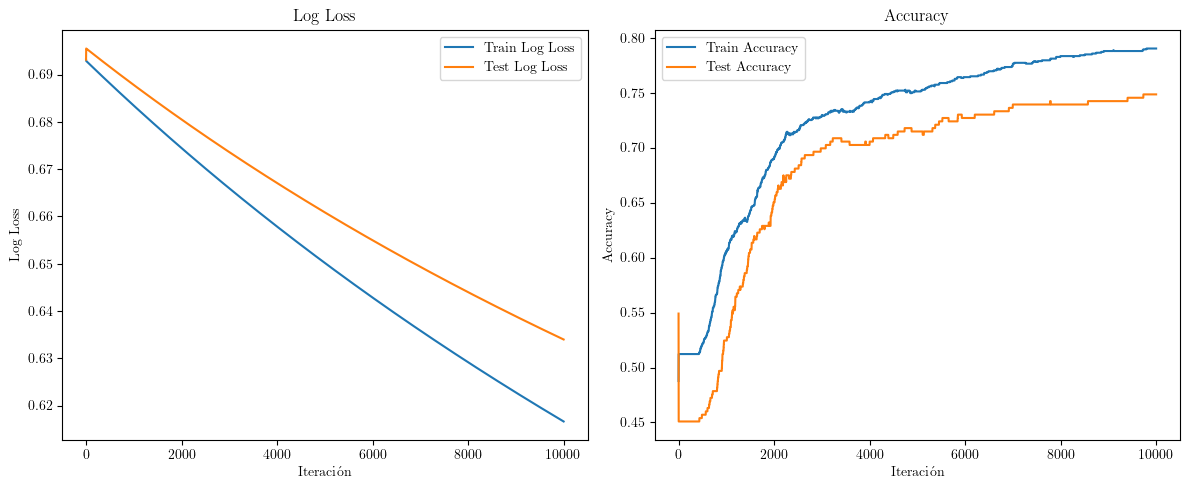

In [172]:
plot_metrics(metrics, save_path='graficos/11.png')

## Ejercicio 4


Ascenso de gradiente para alpha = 1e-06
Iteración 0: Train LogLoss=0.6931 , Acc=0.4877| Test LogLoss=0.6931, Acc=0.5491
Iteración 100: Train LogLoss=0.6919 , Acc=0.5123| Test LogLoss=0.6947, Acc=0.4509
Iteración 200: Train LogLoss=0.6910 , Acc=0.5123| Test LogLoss=0.6939, Acc=0.4509
Iteración 300: Train LogLoss=0.6900 , Acc=0.5123| Test LogLoss=0.6932, Acc=0.4509
Iteración 400: Train LogLoss=0.6891 , Acc=0.5123| Test LogLoss=0.6924, Acc=0.4509
Iteración 500: Train LogLoss=0.6881 , Acc=0.5214| Test LogLoss=0.6916, Acc=0.4571
Iteración 600: Train LogLoss=0.6872 , Acc=0.5306| Test LogLoss=0.6908, Acc=0.4601
Iteración 700: Train LogLoss=0.6862 , Acc=0.5498| Test LogLoss=0.6901, Acc=0.4755
Iteración 800: Train LogLoss=0.6853 , Acc=0.5666| Test LogLoss=0.6893, Acc=0.4785
Iteración 900: Train LogLoss=0.6844 , Acc=0.5911| Test LogLoss=0.6885, Acc=0.4969
Iteración 1000: Train LogLoss=0.6834 , Acc=0.6057| Test LogLoss=0.6878, Acc=0.5245
Iteración 1100: Train LogLoss=0.6825 , Acc=0.6164| Test Lo

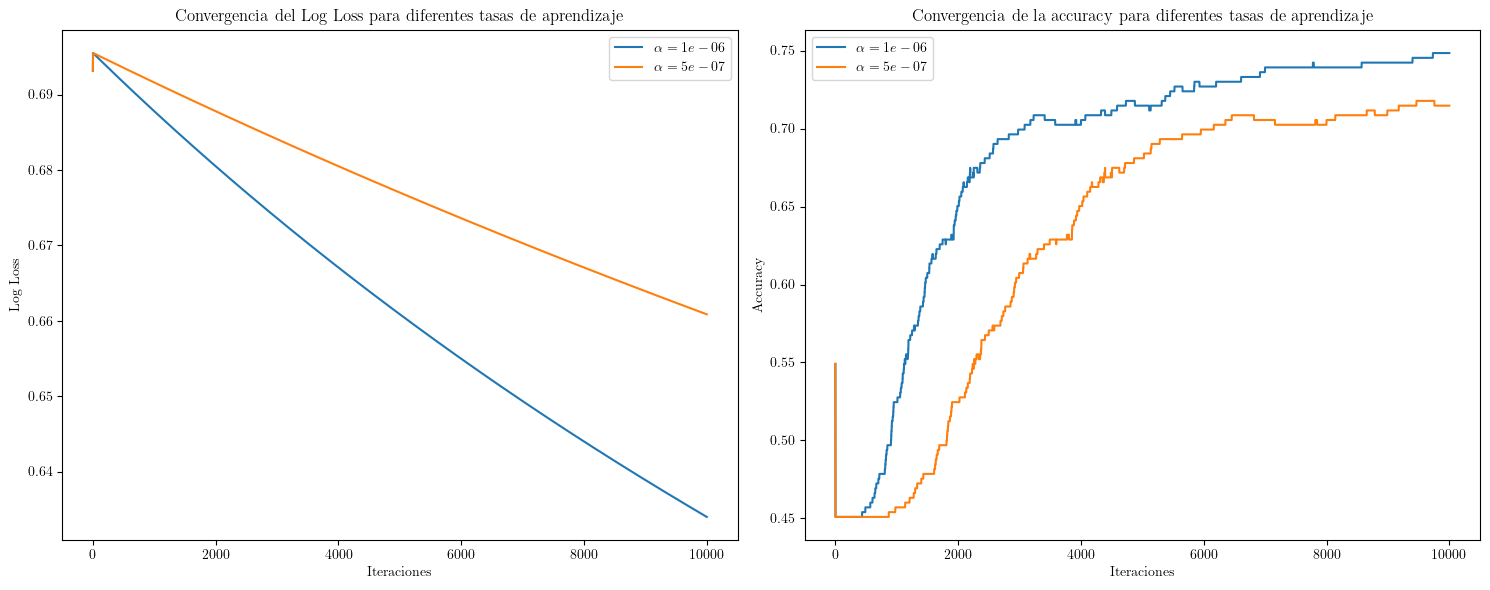

In [177]:
valores_alpha = [1e-6, 5e-7]
alpha_log_loss_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nAscenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_ascent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=10000)
    alpha_log_loss_lists.append(metrics['test_log_loss_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])
    

plt.figure(figsize=(15, 6))

# Graficamos convergencia del Log Loss
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_log_loss_lists[i], label=f'$\\alpha = {alpha}$')
plt.xlabel('Iteraciones')
plt.ylabel('Log Loss')
plt.title('Convergencia del Log Loss para diferentes tasas de aprendizaje')
plt.legend()

# Graficamos convergencia de accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'$\\alpha = {alpha}$')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Convergencia de la accuracy para diferentes tasas de aprendizaje')
plt.legend()

plt.tight_layout()
plt.savefig('graficos/12.png', dpi=300)
plt.show()

## Ejercicio 5